<a href="https://colab.research.google.com/github/xpile98/DeepLearning/blob/master/8_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 추가
import seaborn as sb

In [2]:
# mpg 데이터 로드
mpgData = sb.load_dataset('mpg')

# 데이터 확인
mpgData

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
# 데이터 차원 확인
print(mpgData.shape)

# 결측치 있는지 확인
#mpgData.isna()

# 결측지 제거
mpgData = mpgData.dropna()

# 결측치 제거 후 데이터 차원 확인
print(mpgData.shape)

(398, 9)
(392, 9)


In [4]:
# 독립변수 정의
indVarNames = ['cylinders',	'displacement','horsepower','weight','acceleration','model_year']
x_total = mpgData[indVarNames]
x_total

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


In [5]:
# 종속변수 정의
depVarName = 'mpg'
y_total = mpgData[depVarName]
y_total

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [6]:
# 데이터 분할을 위한 메소드 추가
from sklearn.model_selection import train_test_split

# DataFrame인 변수 -> numpy로 변환
x_total_np = x_total.to_numpy()
y_total_np = y_total.to_numpy()

# 7:3 비율로 train : test 분할
x_train, x_test, y_train, y_test = train_test_split(x_total_np, y_total_np, test_size=0.3, random_state=10)

In [7]:
# 선형 회귀분석 모델 추가
from sklearn import linear_model

# 선형 회귀분석 객체 생성
reg = linear_model.LinearRegression()

# 생성한 선형 회귀분석 모델을 훈련 데이터로 학습시키기
reg.fit(x_train, y_train)

LinearRegression()

In [8]:
# 상수항
print("상수항: %.4f" %reg.intercept_)

# 계수
print("계수: ",reg.coef_) # 계수의 부호와 크기로 대략 파악 가능능 

상수항: -11.0205
계수:  [-0.86888947  0.01551396 -0.00924849 -0.00662918  0.00336088  0.74986572]


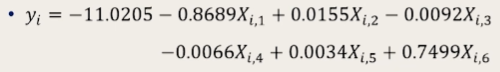

In [9]:
# 모형 성능 평가
y_predicted = reg.predict(x_test)

# 결정계수 (R-square) 함수 추가 및 계산
from sklearn.metrics import r2_score
print("결정계수: %.4f" % r2_score(y_test, y_predicted))

# 수정된 결정계수 (adjusted R-square) 계산
adj_r2_score = 1-(1-r2_score(y_test, y_predicted)) * (len(y_total) - 1) / (len(y_total)-x_total.shape[1]-1)
print("수정된 결정계수: %.4f" % adj_r2_score)

결정계수: 0.7888
수정된 결정계수: 0.7855


# 행렬연산 기반 선형회귀분석

In [10]:
import numpy as np

## 상수항을 추정하기 위한 '자리' 추가
x_train_ones = np.ones(x_train.shape[0])    #train 데이터의 행크기만큼 ones 만듬 (1차원 배열)
x_train_ones = x_train_ones[:,None]         # 2차원 배열로 만듬

# 1벡터와 학습 데이터 집합을 수평 결합
x_train_new = np.hstack((x_train_ones, x_train))  

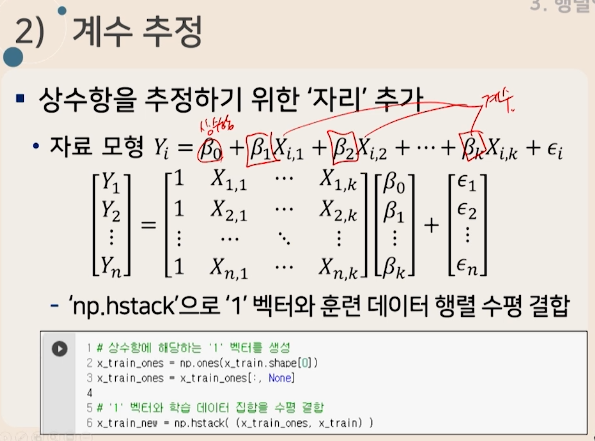

In [11]:
# 최소제곱법으로 계산된 벡터 추정
coef_matrix = np.linalg.inv( (x_train_new.T)@(x_train_new) )@( (x_train_new.T)@(y_train) )
print("상수항과 계수: ", coef_matrix) # 결과가 정확하게 같다.

상수항과 계수:  [-1.10205352e+01 -8.68889465e-01  1.55139610e-02 -9.24848535e-03
 -6.62918336e-03  3.36088065e-03  7.49865725e-01]


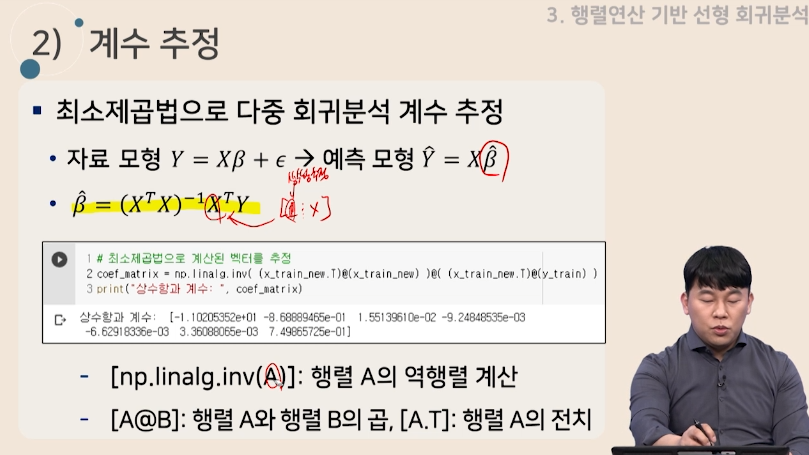

In [12]:
# 테스트 집합의 추정치와 실제 결과 비교


In [16]:
x_test_ones = np.ones(x_test.shape[0])
x_test_ones = x_test_ones[:,None]

x_test_new = np.hstack((x_test_ones, x_test))

y_predicted_matrix = x_test_new @ coef_matrix
y_predicted_matrix = y_predicted_matrix[:,None]

# r2_score_matrix = \
# 1 - ((y_test - y_predicted_matrix).T@(y_test - y_predicted_matrix)) \
# / ( (y_test - np.mean(y_test)).T@(y_test - np.mean(y_test)))

# ndarray를 벡터(행이1개인 행열)로 변환하는 과정에서 발생하는 오류 해결
r2_score_matrix = \
1 - ((y_test[:,None] - y_predicted_matrix).T@(y_test[:,None] - y_predicted_matrix)) \
/ ( (y_test[:,None] - np.mean(y_test)).T@(y_test[:,None] - np.mean(y_test)))

print("결정계수 %.4f" % r2_score_matrix)

adj_r2_score = 1 - (1 - r2_score_matrix) * (len(y_total) - 1) / (len(y_total)-x_total.shape[1]-1)

print("수정된 결정계수: %.4f" % adj_r2_score)

결정계수 0.7888
수정된 결정계수: 0.7855
